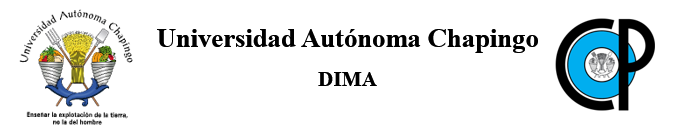

<p style="text-align: justify;"><font face="Times New Roman">Autor: Carlos Ulises Ambrosio Ambrosio</p>

<center><h2><font face="Times New Roman">Lectura y escritura de archivos ráster</h2>
<p style="text-align: justify;"><font face="Times New Roman">Para empezar a trabajar los datos geoespaciales es importante la lectura, extracción y escritura de estos, siendo la base en la creación de programa requerido por el usuario. El código presentado se hace uso de rasterio.open para abrir el archivo ráster, se extrae información básica como el número de bandas, dimensiones, sistema de coordenadas y tipo de dato. Posteriormente se lee la primera banda del ráster con src.read(1). Y finalmente se hace la visualización de datos tanto con rasterio y Matplotlib.</p>
<p style="text-align: justify;"><font face="Times New Roman">Ejemplo de código para leer un archivo ráster:

Número de bandas: 3
Anchura y altura: 614 x 508
Sistema de coordenadas: EPSG:3857
Tipo de dato: uint8


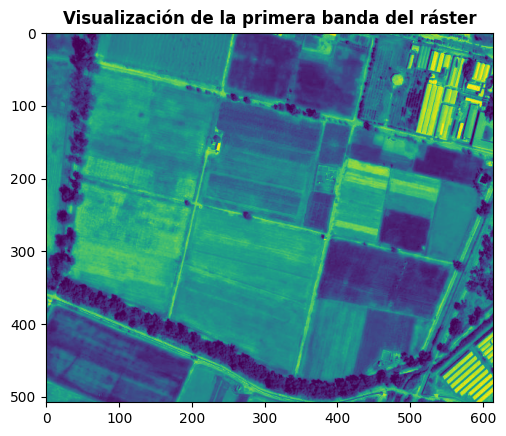

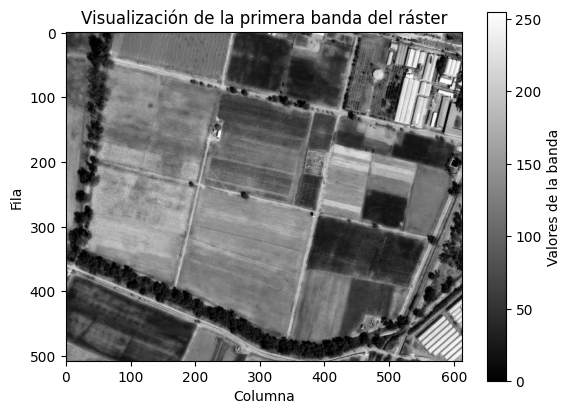

In [2]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

# Nombre y ruta al archivo ráster
raster_path = 'parcela1.tif'

# Leer el archivo ráster
with rasterio.open(raster_path) as src:
    # Obtener información del ráster
    print(f'Número de bandas: {src.count}')
    print(f'Anchura y altura: {src.width} x {src.height}')
    print(f'Sistema de coordenadas: {src.crs}')
    print(f'Tipo de dato: {src.dtypes[0]}')
    
    # Leer la primera banda del ráster
    band1 = src.read(1)

    # Visualizar la banda utilizando Rasterio
    show(band1, title='Visualización de la primera banda del ráster')
    
# Alternativamente, visualización con Matplotlib
plt.imshow(band1, cmap='gray')
plt.colorbar(label='Valores de la banda')
plt.title('Visualización de la primera banda del ráster')
plt.xlabel('Columna')
plt.ylabel('Fila')
plt.show()

<p style="text-align: justify;"><font face="Times New Roman">Para la escritura de un archivo ráster se debe tener una matriz de datos que se quiera guardar y la información de metadatos necesarios. En este código de ejemplo se crea una matriz de ejemplo con valores aleatorios, se define los metadatos necesarios para el nuevo archivo ráster, incluyendo el transform (origen y tamaño de píxel), el sistema de coordenadas y el tipo de dato. Utilizando rasterio.open con el modo 'w' (escritura) se crea un nuevo archivo ráster y escriben los datos en la primera banda. Por Ultimo se confirma que el archivo se ha creado correctamente abriéndolo de nuevo y verificando su información básica.</p>
<p style="text-align: justify;"><font face="Times New Roman">Código de ejemplo:

In [4]:
import rasterio
from rasterio.transform import from_origin

# Crear una matriz de datos de ejemplo (e.g., una matriz de 100x100 con valores aleatorios)
import numpy as np
data = np.random.randint(0, 255, (100, 100), dtype='uint8')

# Definir metadatos del nuevo archivo ráster
transform = from_origin(0, 100, 1, 1)  # origen (0,100), tamaño de píxel (1,1)
new_raster_path = 'nuevo_archivo_raster.tif'

new_meta = {
    'driver': 'GTiff',
    'height': data.shape[0],
    'width': data.shape[1],
    'count': 1,  # número de bandas
    'dtype': data.dtype,
    'crs': 'EPSG:4326',  # sistema de coordenadas
    'transform': transform
}

# Escribir el nuevo archivo ráster
with rasterio.open(new_raster_path, 'w', **new_meta) as dst:
    dst.write(data, 1)  # escribir los datos en la primera banda

# Confirmar que el archivo se ha creado correctamente
with rasterio.open(new_raster_path) as src:
    print(f'Archivo creado: {new_raster_path}')
    print(f'Número de bandas: {src.count}')
    print(f'Anchura y altura: {src.width} x {src.height}')
    print(f'Sistema de coordenadas: {src.crs}')

Archivo creado: nuevo_archivo_raster.tif
Número de bandas: 1
Anchura y altura: 100 x 100
Sistema de coordenadas: EPSG:4326


<center><h2><font face="Times New Roman">Lectura y escritura de datos vectoriales</h2>
<p style="text-align: justify;"><font face="Times New Roman">Pasando al uso de los datos vectoriales una de las herramientas con variedad de funciones es GeoPandas, que extiende las capacidades de pandas agregando soporte a los datos geoespaciales, como se indica en su web GeoPandas es una librería que busca facilitar el trabajo de los datos geoespaciales en Python, permitiendo realizar operaciones fácilmente que de otra forma requeriría paquetes especializados como PostGis.</p>
<p style="text-align: justify;"><font face="Times New Roman">En el siguiente código se realiza la lectura de un archivo vectorial en donde usando gpd.read_file() se lee un archivo vectorial (shapefile) y cargarlo en un GeoDataFrame. Se inicializa el código mostrando las primeras filas del GeoDataFrame con head(). Empleando info() se obtiene la información sobre las columnas, los tipos de datos y los valores nulos y se muestra mediante la función print() en la consola. La siguiente línea describe() se encarga de obtener las estadísticas descriptivas de los datos numéricos. Por último se visualiza el mapa de los datos vectoriales utilizando plot().</p>


In [5]:
import geopandas as gpd

# Leer un archivo shapefile
shapefile_path = 'ruta_al_archivo_shapefile.shp'
gdf = gpd.read_file(shapefile_path)

# Mostrar las primeras filas del GeoDataFrame
print(gdf.head())

# Mostrar información del GeoDataFrame
print(gdf.info())

# Mostrar un resumen de los datos
print(gdf.describe())

# Visualizar el mapa de los datos vectoriales
gdf.plot()
plt.title('Visualización del Shapefile')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

DataSourceError: ruta_al_archivo_shapefile.shp: No such file or directory

<p style="text-align: justify;"><font face="Times New Roman">En la escritura de un GeoDataFrame en un archivo vectorial, se puede emplear el método to_file de Geopandas. El presente código crea un GeoDataFrame con algunos datos de ejemplo y geometrías de puntos utilizando shapely.geometry.Point. Se define el sistema de coordenadas (CRS) del GeoDataFrame con set_crs. Ejecutando to_file se guardar el GeoDataFrame en un nuevo archivo shapefile y por último se hace una confirmación del archivo que se ha creado imprimiendo la ruta del archivo.</p>

In [6]:
import geopandas as gpd
from shapely.geometry import Point

# Crear algunos datos de ejemplo
data = {
    'Name': ['Point1', 'Point2', 'Point3'],
    'Value': [10, 20, 30]
}
geometry = [Point(1, 1), Point(2, 2), Point(3, 3)]

# Crear un GeoDataFrame
gdf = gpd.GeoDataFrame(data, geometry=geometry)

# Definir el sistema de coordenadas (CRS)
gdf.set_crs(epsg=4326, inplace=True)

# Guardar el GeoDataFrame en un nuevo archivo shapefile
output_shapefile_path = 'nuevo_archivo_shapefile.shp'
gdf.to_file(output_shapefile_path)

# Confirmar que el archivo se ha creado correctamente
print(f'Archivo creado: {output_shapefile_path}')

Archivo creado: nuevo_archivo_shapefile.shp
